In [1]:
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#
# License: BSD 3 clause

In [2]:
from PIL import Image

In [3]:
image = Image.open('./flower_in_a_restaurant.jpg')
print(image.format)
print(image.size)
print(image.mode)
# show the image

JPEG
(2606, 3434)
RGB


In [4]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
#from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [5]:
# Load the photo I've made in a corean restaurant near Shuilavska metro station
flower = image #load_sample_image("china.jpg")

# Convert to floats instead of the default JpegImageFile. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
flower = np.array(flower, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

In [6]:
labels = []
kmeans = []
depth = [128,64,32,16,8]
for i in range(5):
    n_colors = depth[i]
    print(f"\t[{i}] Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array.copy(), random_state=0, n_samples=1_000)
    kmeans.append(
            KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
            image_array_sample
        )
    )
    print(f"\t\t[{i}] done in {time() - t0:0.3f}s.")

    # Get labels for all points
    print(f"\t[{i}] Predicting color indices on the full image (k-means): {depth[i]}")
    t0 = time()
    labels.append(kmeans[i].predict(image_array.copy()))
    print(f"\t\t[{i}] done in {time() - t0:0.3f}s.\n")

	[0] Fitting model on a small sub-sample of the data
		[0] done in 0.441s.
	[0] Predicting color indices on the full image (k-means): 128
		[0] done in 0.398s.

	[1] Fitting model on a small sub-sample of the data
		[1] done in 0.410s.
	[1] Predicting color indices on the full image (k-means): 64
		[1] done in 0.173s.

	[2] Fitting model on a small sub-sample of the data
		[2] done in 0.456s.
	[2] Predicting color indices on the full image (k-means): 32
		[2] done in 0.163s.

	[3] Fitting model on a small sub-sample of the data
		[3] done in 0.404s.
	[3] Predicting color indices on the full image (k-means): 16
		[3] done in 0.112s.

	[4] Fitting model on a small sub-sample of the data
		[4] done in 0.396s.
	[4] Predicting color indices on the full image (k-means): 8
		[4] done in 0.100s.



In [7]:
for i in labels:
    print(i)

[ 0 81 43 ... 20 20 20]
[ 0 43 43 ... 20 20 20]
[ 0  0  0 ... 14 14 14]
[ 0  0  0 ... 14 14 14]
[0 0 0 ... 0 0 0]


In [8]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

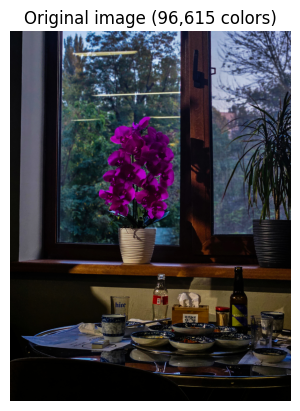

In [9]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower)

In [10]:
images = [flower]
titles = ["Original image (96,615 colors)"]
for i in range(5):
    titles.append(f"Quantized image ({depth[i]} colors, K-Means)")
    images.append(recreate_image(kmeans[i].cluster_centers_, labels[i], w, h))

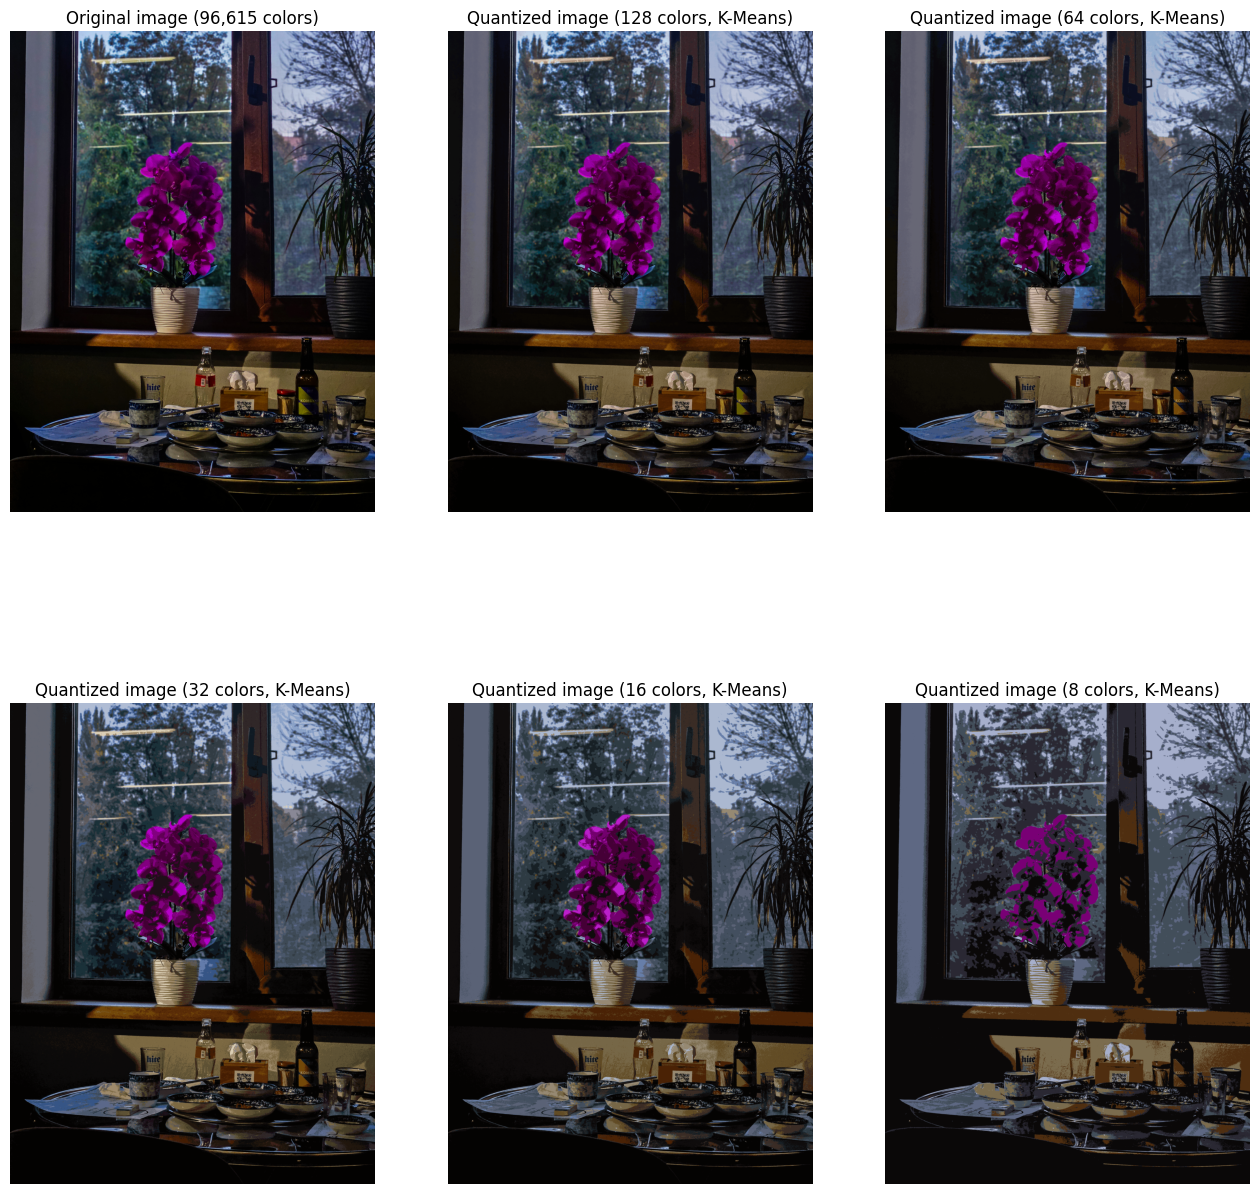

In [13]:
plt.figure(figsize=(16,16)) # specifying the overall grid size

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.axis("off")
    plt.title(titles[i])
    plt.imshow(images[i])

plt.show()